### Ch17 Figure1

In [1]:
# Maybe they found that very colorful shoes have done well the past.

data = []

for i in range(5000):
    
    if rd.random() <= .35:
        bought = 'N'
    else:
        bought = 'Y'
    
    if bought == 'Y':
        if rd.random() <= .85:
            shoes_has_multiple_colors = 1
        else:
            shoes_has_multiple_colors = 0
        if rd.random() <= .75:
            if rd.random() <= .25:
                r_times = rd.randint(4,5)
            else:
                r_times = rd.randint(1,5)
        else:
            r_times = 0
        if rd.random() <= .35:
            shoes_has_cool_features = 1
        else:
            shoes_has_cool_features = 0
    else:
        if rd.random() <= .35:
            shoes_has_multiple_colors = 1
        else:
            shoes_has_multiple_colors = 0
        if rd.random() <= .15:
            shoes_has_cool_features = 1
        else:
            shoes_has_cool_features = 0
        r_times = rd.randint(0,2)
    
    data.append([i, r_times, shoes_has_cool_features, shoes_has_multiple_colors, bought])

df = pd.DataFrame(data, columns=['id', 'run-times', 'shoe-has-cool-features', 'shoe-has-colors', 'bought'])
# df.to_csv('csv_output/ch17_fig1.csv', index=False)
df = pd.read_csv('csv_output/ch17_fig1.csv')
df.head()

,id,run-times,shoe-has-cool-features,shoe-has-colors,bought
0,0,2,0,0,N
1,1,1,0,1,N
2,2,0,0,0,N
3,3,0,0,1,N
4,4,5,0,1,Y


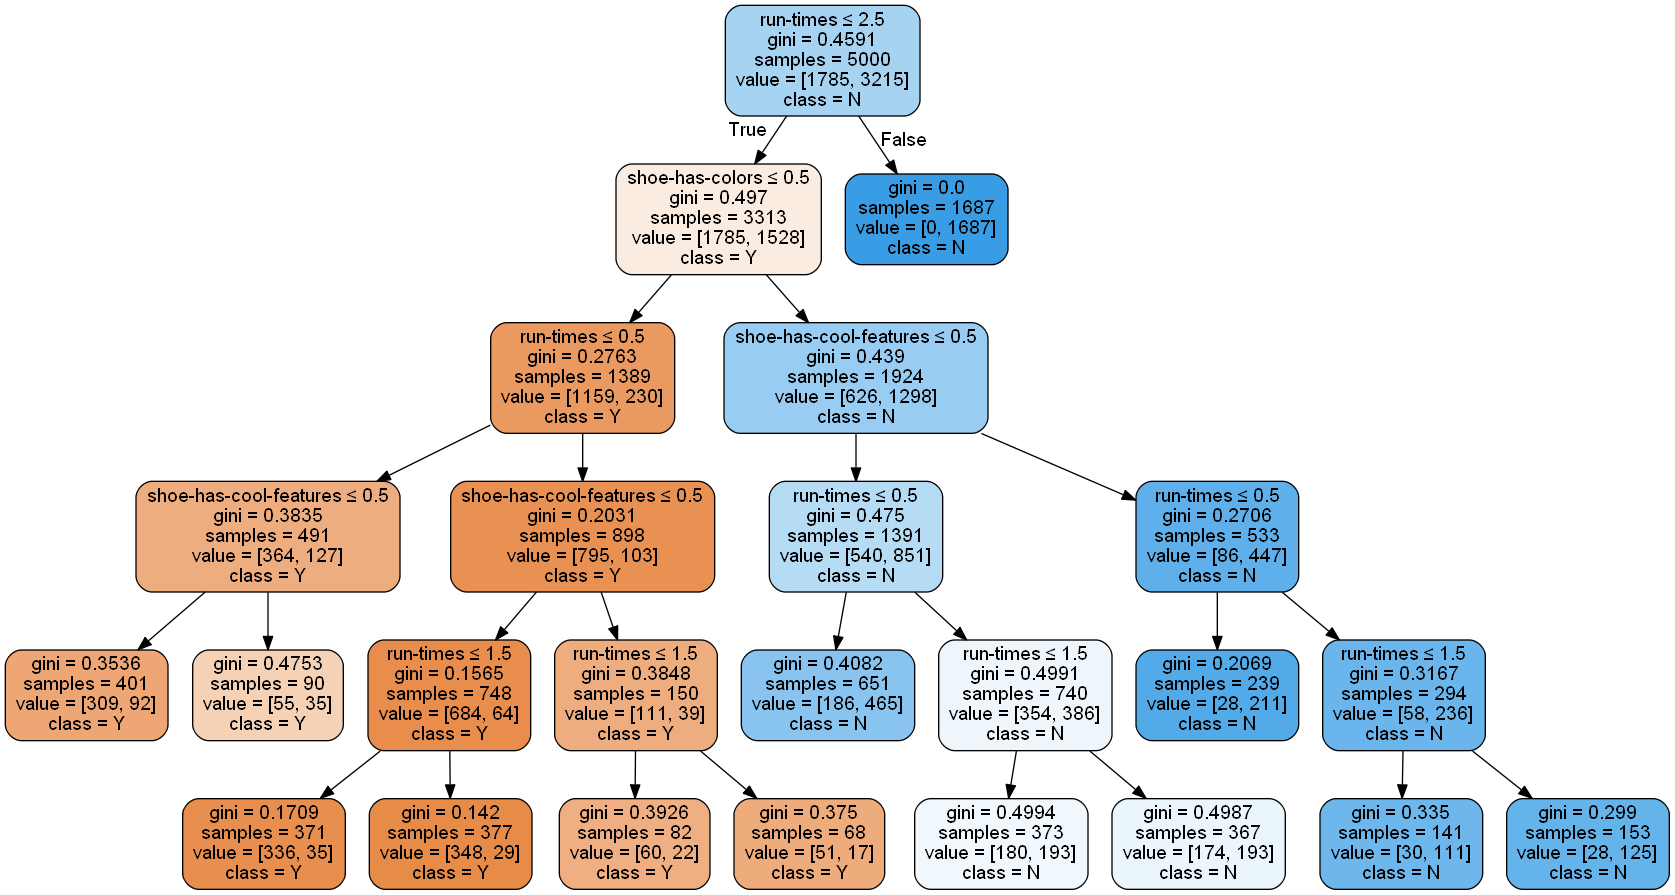

In [3]:
df = pd.read_csv('csv_output/ch17_fig1.csv')

%matplotlib inline
sns.set_style("white")
cm = sns.color_palette('Blues', 6)

# f, ax = plt.subplots(1,1, figsize=(8,8))

from sklearn.externals.six import StringIO
from sklearn import tree
import pydot
from IPython.display import Image 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df.iloc[:,1:-1], df.iloc[:,-1])


with open("svg_output/ch17_fig1.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=df.columns[1:-1],  
                         class_names=['Y', 'N'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())
# graph[0].write_svg('svg_output/ch17_fig1.svg') # write to svg
Image(graph[0].create_png())

I have random generated data, assuming it's coming from another survey and it has the following variables:
1. how many time does one run per week?
2. does the shoe has cool features?
3. does the shoe has many colors?
4. did the respondent buy the shoes?

The fourth feature is used as dependent variable for decision tree to predict.